<a href="https://colab.research.google.com/github/egimat/randomwalk/blob/main/TennisAces_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.patches as mpatches

In [ ]:
df=pd.read_csv('/tennis_stats.csv')

df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [ ]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


<ipython-input-9-25e7e6c31090>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(1), annot=True)


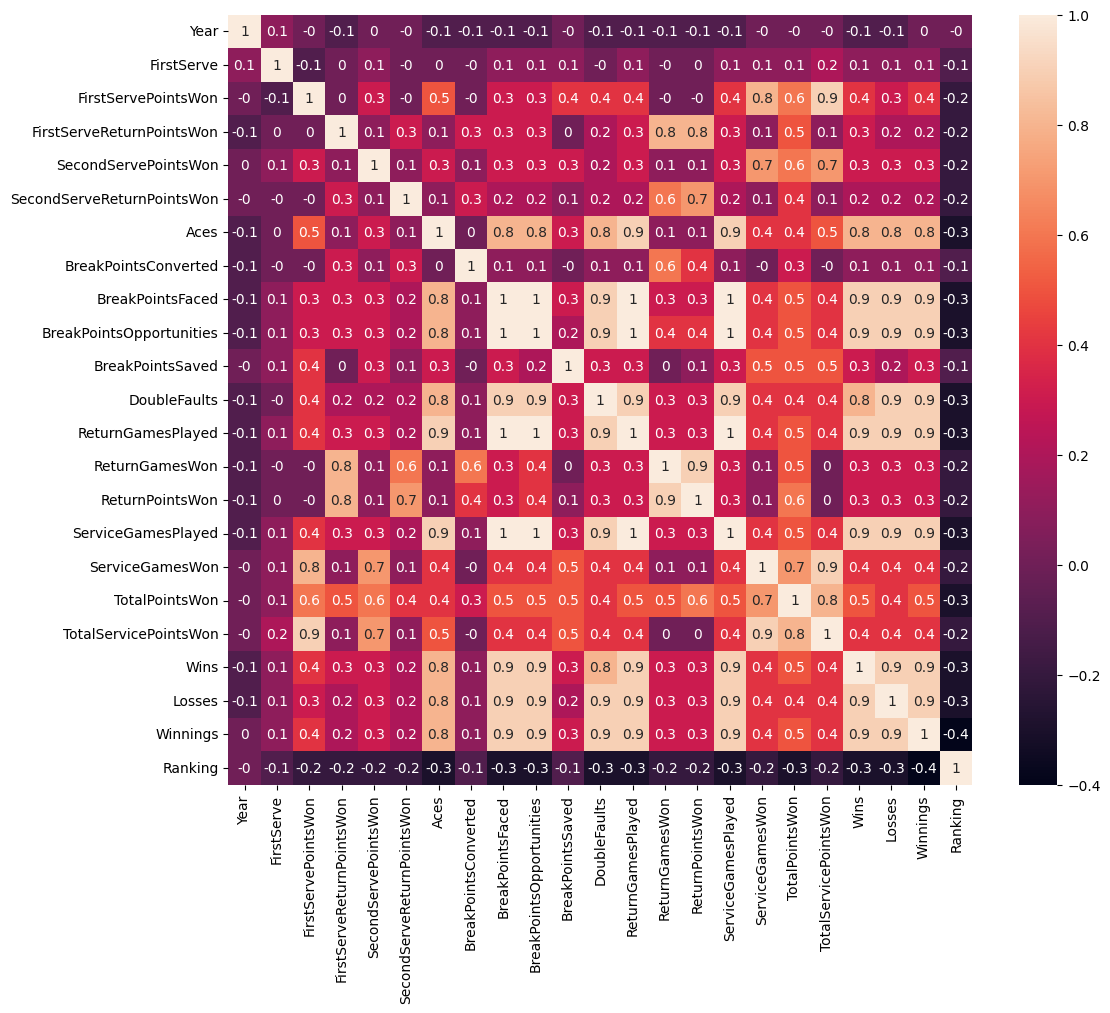

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr().round(1), annot=True)
plt.show()

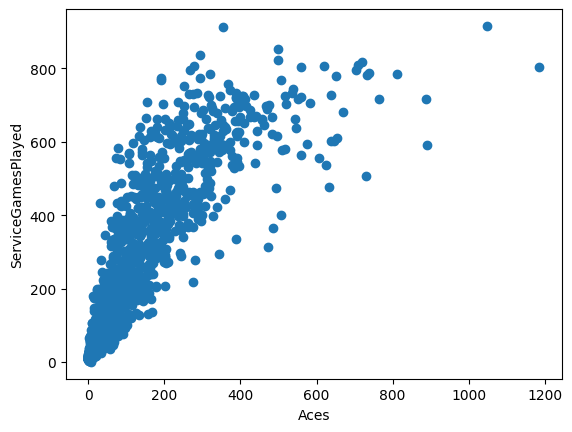

In [ ]:
plt.scatter(df.Aces, df.ServiceGamesPlayed)
plt.xlabel('Aces')
plt.ylabel('ServiceGamesPlayed')
plt.show()

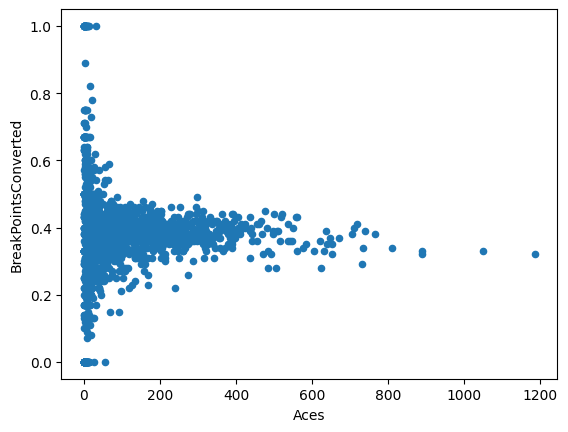

In [ ]:
df.plot.scatter('Aces', 'BreakPointsConverted')
plt.xlabel('Aces')
plt.ylabel('BreakPointsConverted')
plt.show()

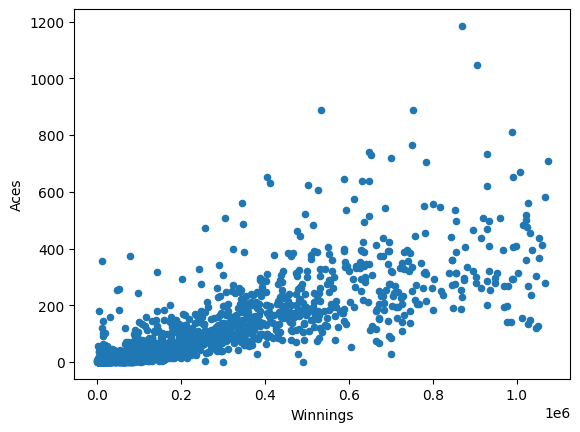

In [ ]:
df.plot.scatter('Winnings', 'Aces')
plt.xlabel('Winnings')
plt.ylabel('Aces')
plt.show()

<Axes: xlabel='Wins', ylabel='Count'>

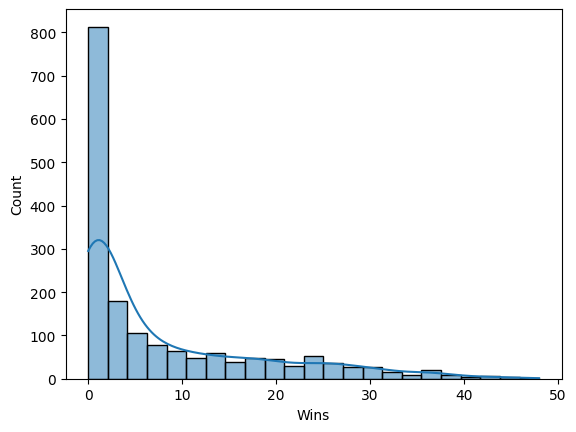

In [ ]:
sns.histplot(df.Wins,kde=True)

# **Single-variable Linear Regression**

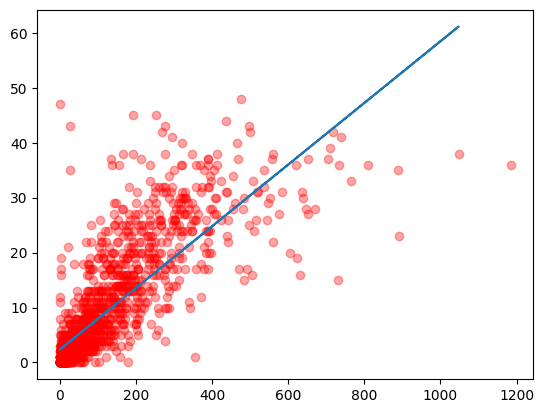

In [ ]:
x=df[['Aces']]
y=df[['Wins']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,train_size=0.2)

slr=LinearRegression()

model=slr.fit(x_train,y_train)

coef=model.coef_
intercept=model.intercept_

predict=model.predict(x_test)

plt.plot(x_test,predict)
plt.scatter(x,y,alpha=0.35, color='r')
plt.show()


In [ ]:
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)

print('sing. train score: %.2f' %train_score)
print('sing. test score: %.2f' %test_score)

sing. train score: 0.72
sing. test score: 0.67


# **Multivariate Linear Regression**

Mean-squared-error: 15.59


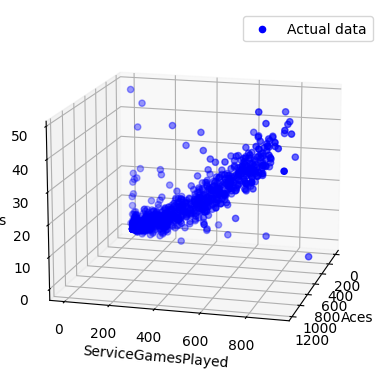

In [ ]:
x21=df[['Aces']]
x22=df[['ServiceGamesPlayed']]
y2=df[['Wins']]

X2=np.hstack((x21,x22))

x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.8,train_size=0.2)

mlr2=LinearRegression()

model2=mlr2.fit(x2_train,y2_train)

coef2=model2.coef_
intercept2=model2.intercept_

predict2=model2.predict(x2_test)

mse=mean_squared_error(y2_test,predict2)
print('Mean-squared-error: %.2f' %mse)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

# ax.scatter(x21, x22, y2, c='blue',alpha=0.2, marker='o', label='Actual data')
ax.scatter(x2_test[:, 0], x2_test[:, 1], y2_test, c='blue', marker='o', label='Actual data')

aces_plane = np.linspace(x2_test[:, 0].min(), x2_test[:, 0].max(), 100)
servgames_plane = np.linspace(x2_test[:, 1].min(), x2_test[:, 1].max(), 100)
aces_plane, games_plane = np.meshgrid(aces_plane, servgames_plane)

intercept = model2.intercept_
coef_aces=model2.coef_[0][0]
coef_games=model2.coef_[0][1]

wins_plane = intercept + coef_aces * aces_plane + coef_games * games_plane



ax.set_xlabel('Aces')
ax.set_ylabel('ServiceGamesPlayed')
ax.set_zlabel('Wins')

ax.legend()

ax.view_init(elev=15, azim=15)

plt.show()



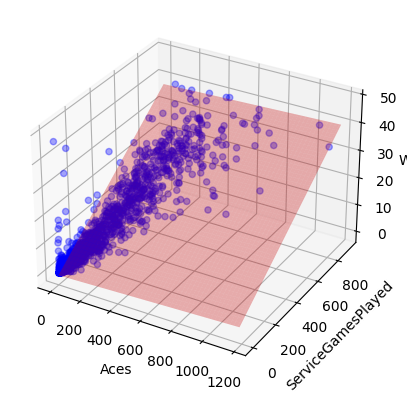

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual dat
scatter=ax.scatter(x21, x22, y, c='blue', marker='o', label='Actual data',alpha=0.35)

# Create a meshgrid for plotting the regression plane
x1_plane = np.linspace(x21.min(), x21.max(), 100)
x2_plane = np.linspace(x22.min(), x22.max(), 100)
x1_plane, x2_plane = np.meshgrid(x1_plane, x2_plane)
y_plane = model2.intercept_ + model2.coef_[0, 0] * x1_plane + model2.coef_[0, 1] * x2_plane

# Plot the regression plane
surface=ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.3, color='red', label='Regression Plane')

# Set labels
ax.set_xlabel('Aces')
ax.set_ylabel('ServiceGamesPlayed')
ax.set_zlabel('Wins')

# Show the plot
plt.show()

In [ ]:
train2_score=model2.score(x2_train,y2_train)
test2_score=model2.score(x2_test,y2_test)

print('multi train score: %.2f' %train2_score)
print('multi test score: %.2f' %test2_score)

multi train score: 0.91
multi test score: 0.85
